In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

PlayersDict={
    "Huskies_G1":0,
    "Huskies_D1":1,
    "Huskies_D2":2,
    "Huskies_D3":3,
    "Huskies_D4":4,
    "Huskies_D5":5,
    "Huskies_D6":6,
    "Huskies_D7":7,
    "Huskies_D8":8,
    "Huskies_D9":9,
    "Huskies_D10":10,
    "Huskies_M1":11,
    "Huskies_M2":12,
    "Huskies_M3":13,
    "Huskies_M4":14,
    "Huskies_M5":15,
    "Huskies_M6":16,
    "Huskies_M7":17,
    "Huskies_M8":18,
    "Huskies_M9":19,
    "Huskies_M10":20,
    "Huskies_M11":21,
    "Huskies_M12":22,
    "Huskies_M13":23,
    "Huskies_F1":24,
    "Huskies_F2":25,
    "Huskies_F3":26,
    "Huskies_F4":27,
    "Huskies_F5":28,
    "Huskies_F6":29
}
PlayersDictRev={v:k for k,v in PlayersDict.items()}
PlayersDictShort={
    "G1":0,
    "D1":1,
    "D2":2,
    "D3":3,
    "D4":4,
    "D5":5,
    "D6":6,
    "D7":7,
    "D8":8,
    "D9":9,
    "D10":10,
    "M1":11,
    "M2":12,
    "M3":13,
    "M4":14,
    "M5":15,
    "M6":16,
    "M7":17,
    "M8":18,
    "M9":19,
    "M10":20,
    "M11":21,
    "M12":22,
    "M13":23,
    "F1":24,
    "F2":25,
    "F3":26,
    "F4":27,
    "F5":28,
    "F6":29
}
PlayersDictShortRev={v:k for k,v in PlayersDictShort.items()}

In [ ]:
PassTotal=[]
for _ in range(30):
    PassTotal.append([0]*30)
Pass=[]
for _ in range(38):
    temp=[]
    for _ in range(30):
        temp.append([0]*30)
    Pass.append(temp)

Error: 'Kernelspec' module not installed in the selected interpreter ({0}).
 Please re-install or update 'jupyter'.

In [4]:
PassTotal=[]
for _ in range(30):
    PassTotal.append([0]*30)
Pass=[]
for _ in range(38):
    temp=[]
    for _ in range(30):
        temp.append([0]*30)
    Pass.append(temp)

data=pd.read_csv("passingevents.csv")
"""print(data["EventOrigin_x"].max(),data["EventOrigin_x"].min()) #100
print(data["EventOrigin_y"].max(),data["EventOrigin_y"].min())
print(data["EventDestination_x"].max(),data["EventDestination_x"].min())
print(data["EventDestination_y"].max(),data["EventDestination_y"].min())"""
N=data.shape[0]
#count=0

"""print(data['EventDestination_x'][0])
print(type(data['EventDestination_x'][0]))
print(data['EventOrigin_x'][0])
print(type(data['EventOrigin_x'][0]))
"""

ValueDict = {"Cross":1.5, "Hand pass":0.6, "Head pass":1.1, "High pass":0.9, "Launch":0.5, "Simple pass":1.0, "Smart pass":2.0}

def GoalDistance(x):
    x1 = data['EventOrigin_x'][x]
    x2 = data['EventDestination_x'][x]
    return ((1-(0.5 * np.tan(11.0/6.0 * ((100-x1)/100.0 - 0.6))))*0.3 + (1-(0.5 * np.tan(11.0/6.0 * ((100-x2)/100.0 - 0.6))))*0.7)
    #return (1-(0.5 * np.tan(11.0/6.0 * ((100-x2)/100.0 - 0.6))))
def EvaluatePass(x):
    a=ValueDict[data['EventSubType'][x]]
    b=GoalDistance(x)
    c=a*b
    #print(x,data['EventSubType'][x],data["OriginPlayerID"][x],data["DestinationPlayerID"][x],data['EventOrigin_x'][x],data['EventDestination_x'][x],a,b,c)
    return c



for i in range(N):
    if data["TeamID"][i]=="Huskies":
        OP=data["OriginPlayerID"][i]
        DP=data["DestinationPlayerID"][i]
        """if OP==DP:
            print(data[i:i+1])
            count+=1"""
        #PassTotal[PlayersDict[OP]][PlayersDict[DP]]+=1
        #Pass[data["MatchID"][i]-1][PlayersDict[OP]][PlayersDict[DP]]+=1
        PassValue = EvaluatePass(i)
        PassTotal[PlayersDict[OP]][PlayersDict[DP]] += PassValue
        Pass[data["MatchID"][i]-1][PlayersDict[OP]][PlayersDict[DP]] += PassValue





for i in range(30):
    for j in range(30):
        PassTotal[i][j]=float('%.1f' %PassTotal[i][j])

for k in range(38):
    for i in range(30):
        for j in range(30):
            Pass[k][i][j]=float('%.1f' %Pass[k][i][j])



"""#print(count)
temp=pd.DataFrame(PassTotal).rename(columns=PlayersDictShortRev,index=PlayersDictShortRev).replace(0,np.nan)
#temp.to_csv("./Pass/Total.csv")
f, ax = plt.subplots(figsize=(30, 30))
ax = sns.heatmap(temp,cmap="Reds",square=True,annot=True,fmt='.2f')
plt.savefig("./Pass/Total.png")
plt.show()"""




'#print(count)\ntemp=pd.DataFrame(PassTotal).rename(columns=PlayersDictShortRev,index=PlayersDictShortRev).replace(0,np.nan)\n#temp.to_csv("./Pass/Total.csv")\nf, ax = plt.subplots(figsize=(30, 30))\nax = sns.heatmap(temp,cmap="Reds",square=True,annot=True,fmt=\'.2f\')\nplt.savefig("./Pass/Total.png")\nplt.show()'

In [13]:
#print(pd.DataFrame(PassTotal))
#print(pd.DataFrame(Pass[0]))
PlayTime={}
for i in range(38):
    temp=pd.DataFrame(Pass[i])
    temp=temp.rename(columns=PlayersDictShortRev,index=PlayersDictShortRev)
    #temp[temp == 0] = np.nan
    temp=temp.replace(0,np.nan)
    temp=temp.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False)
    temp=temp.dropna(axis=1, how='all', thresh=None, subset=None, inplace=False)
    N=temp.shape[0]
    for j in range(N):
        Player=temp.index[j]
        if Player in PlayTime:
            PlayTime[Player]+=1
        else:
            PlayTime[Player]=1
    #print(temp)
    #temp=temp.fillna(value=0,axis=0)
    #temp=temp.fillna(value=0,axis=1)
    """for j in range(30):
        temp=temp[temp[j]!=0]"""
    #temp=temp.loc[:, (temp != 0).any(axis=0)]
    #temp=pd.DataFrame(np.array(temp).astype("int64"))
    #temp=temp.rename(columns=PlayersDictShortRev,index=PlayersDictShortRev)
    #temp.to_csv("./Pass/Match"+str(i+1)+".csv")
print(sorted(PlayTime.items(),key=lambda x:x[1],reverse=True))

[('G1', 38), ('M1', 33), ('M4', 33), ('F1', 32), ('F2', 31), ('D1', 30), ('M3', 30), ('M6', 27), ('D3', 24), ('D2', 23), ('D4', 22), ('D5', 21), ('D7', 19), ('F4', 19), ('D6', 15), ('M12', 15), ('M8', 14), ('F5', 14), ('F6', 14), ('M9', 12), ('D8', 12), ('M11', 8), ('M2', 7), ('F3', 7), ('M10', 7), ('M5', 5), ('M13', 4), ('D10', 4), ('D9', 2), ('M7', 1)]


In [57]:
doub=[]
trip=[]
quad=[]
for i in range(30):
    iname=PlayersDictRev[i]
    index=iname.find("_")
    iname=iname[index+1:]
    for j in range(i+1,30):
        jname=PlayersDictRev[j]
        index=jname.find("_")
        jname=jname[index+1:]
        sum=PassTotal[i][j]+PassTotal[j][i]
        doub.append([sum,iname,jname])
        for k in range(j+1,30):
            kname=PlayersDictRev[k]
            index=kname.find("_")
            kname=kname[index+1:]
            sum=PassTotal[i][j]+PassTotal[j][i]+PassTotal[i][k]+PassTotal[k][i]+PassTotal[k][j]+PassTotal[j][k]
            trip.append([sum,iname,jname,kname])
            for l in range(k+1,30):
                lname=PlayersDictRev[l]
                index=lname.find("_")
                lname=lname[index+1:]
                sum=PassTotal[i][j]+PassTotal[j][i]+PassTotal[i][k]+PassTotal[k][i]+PassTotal[k][j]+PassTotal[j][k]+PassTotal[i][l]+PassTotal[l][i]+PassTotal[j][l]+PassTotal[l][j]+PassTotal[k][l]+PassTotal[l][k]
                quad.append([sum,iname,jname,kname,lname])

doub.sort(key=lambda x:x[0],reverse=True)
trip.sort(key=lambda x:x[0],reverse=True)
quad.sort(key=lambda x:x[0],reverse=True)
print(doub[:10],"\n")
print(trip[:10],"\n")
print(quad[:10],"\n")

[[342.4, 'M1', 'F2'], [338.6, 'M1', 'M3'], [213.4, 'D5', 'F2'], [196.0, 'D1', 'D3'], [179.8, 'D1', 'M1'], [172.0, 'D5', 'M1'], [164.8, 'D4', 'M3'], [161.8, 'D4', 'M1'], [161.8, 'M1', 'M4'], [161.4, 'D5', 'M6']] 

[[816.1, 'M1', 'M3', 'F2'], [727.8, 'D5', 'M1', 'F2'], [665.2, 'D4', 'M1', 'M3'], [663.3, 'D5', 'M1', 'M3'], [661.4, 'D4', 'M1', 'F2'], [641.3000000000001, 'D1', 'M1', 'M3'], [636.5, 'M1', 'M6', 'F2'], [632.1, 'D1', 'M1', 'F2'], [624.9, 'M1', 'M4', 'F2'], [576.6, 'M1', 'M3', 'M6']] 

[[1354.2, 'D5', 'M1', 'M3', 'F2'], [1299.9000000000003, 'D4', 'M1', 'M3', 'F2'], [1228.7000000000003, 'D1', 'M1', 'M3', 'F2'], [1192.4, 'M1', 'M3', 'M6', 'F2'], [1183.3, 'D5', 'M1', 'M6', 'F2'], [1159.7, 'M1', 'M3', 'M4', 'F2'], [1144.8999999999999, 'D3', 'M1', 'M3', 'F2'], [1113.5, 'D1', 'D5', 'M1', 'F2'], [1106.7, 'D2', 'M1', 'M3', 'F2'], [1099.5, 'D1', 'D4', 'M1', 'M3']] 



In [ ]:
# -*- coding: utf-8 -*-

#All Players
data=pd.read_csv("passingevents.csv")
N=data.shape[0]
xy=[]
for i in range(N):
    if data["TeamID"][i]=="Huskies":
        x=data["EventOrigin_x"][i]*1.05
        y=data["EventOrigin_y"][i]*0.68
        xy.append((x,y))
        x=data["EventDestination_x"][i]*1.05
        y=data["EventDestination_y"][i]*0.68
        xy.append((x,y))

df = pd.DataFrame(xy, columns=["x(0m - 105m)\n————————>\nAttack Direction", "y(0m - 68m)"])
g=sns.jointplot(x="x(0m - 105m)\n————————>\nAttack Direction", y="y(0m - 68m)", data=df, kind="kde",xlim=(-20,120),ylim=(-20,90))
g.fig.set_figwidth(10.5)
g.fig.set_figheight(6.8)
g.fig.suptitle("Total HeatMap",fontsize=20)
g.savefig("./HeatMap/Origin/Total HeatMap.png", dpi=300)



#Single Player
data=pd.read_csv("passingevents.csv")
N=data.shape[0]
for j in range(30):
    xy=[]
    for i in range(N):
        if data["TeamID"][i]=="Huskies" and data["OriginPlayerID"][i]==PlayersDictRev[j]:
            x=data["EventOrigin_x"][i]*1.05
            y=data["EventOrigin_y"][i]*0.68
            xy.append((x,y))
            x=data["EventDestination_x"][i]*1.05
            y=data["EventDestination_y"][i]*0.68
            xy.append((x,y))

    df = pd.DataFrame(xy, columns=["x(0m - 105m)\n————————>\nAttack Direction", "y(0m - 68m)"])
    g=sns.jointplot(x="x(0m - 105m)\n————————>\nAttack Direction", y="y(0m - 68m)", data=df, kind="kde",xlim=(-20,120),ylim=(-20,90))
    g.fig.set_figwidth(10.5)
    g.fig.set_figheight(6.8)
    g.fig.suptitle(PlayersDictShortRev[j]+"'s HeatMap",fontsize=20)
    g.savefig("./HeatMap/Origin/"+PlayersDictShortRev[j]+"'s HeatMap.png", dpi=300)


"""f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)"""

Error: 'Kernelspec' module not installed in the selected interpreter ({0}).
 Please re-install or update 'jupyter'.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

points = np.arange(-5,5,0.01)

x,y = np.meshgrid(points,points)
z = np.sqrt(x**2 + y**2)
cmaps = [plt.cm.jet, plt.cm.gray, plt.cm.cool, plt.cm.hot]

fig, axes = plt.subplots(2, 2)

for i, ax in enumerate(axes.ravel()):
    ax.imshow(z,cmap=cmaps[i])

plt.show()

Error: 'Kernelspec' module not installed in the selected interpreter ({0}).
 Please re-install or update 'jupyter'.

In [ ]:
from pyheatmap.heatmap import HeatMap
import numpy as np

data=pd.read_csv("passingevents.csv")
N=data.shape[0]
xy=[]
for i in range(N):
    if data["TeamID"][i]=="Huskies":
        x=data["EventOrigin_x"][i]*2
        y=data["EventOrigin_y"][i]
        xy.append([x,y,1])
heat = HeatMap(xy)
heat.heatmap(save_as="2.png")

Error: 'Kernelspec' module not installed in the selected interpreter ({0}).
 Please re-install or update 'jupyter'.

In [ ]:
# -*- coding: utf-8 -*-

from PIL import Image
foreground = Image.open("./HeatMap/lines.png")
for i in range(30):
    background = Image.open("./HeatMap/Origin/"+PlayersDictShortRev[i]+"'s HeatMap.png")
    background.paste(foreground, (525, 607), foreground)
    background.save("./HeatMap/"+PlayersDictShortRev[i]+"'s HeatMap.png")
background = Image.open("./HeatMap/Origin/Total HeatMap.png")
background.paste(foreground, (525, 607), foreground)
background.save("./HeatMap/Total.png")

Error: 'Kernelspec' module not installed in the selected interpreter ({0}).
 Please re-install or update 'jupyter'.

In [66]:
ValueDict = {"Smart":2.0,"Cross":1.5, "Head":1.1, "Simple":1.0, "High":0.9, "Hand":0.6, "Launch":0.5 }
temp=pd.DataFrame.from_dict(ValueDict,orient="index")
print(temp)
sns.palplot(sns.light_palette("seagreen",reverse=True))

0
Smart   2.0
Cross   1.5
Head    1.1
Simple  1.0
High    0.9
Hand    0.6
Launch  0.5


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Smart  Cross  Head  Simple  High  Hand  Launch
    2.0    1.5   1.1     1.0   0.9   0.6     0.5


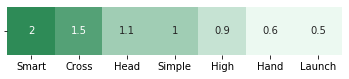

In [81]:
ValueDict=[[2.0,1.5,1.1,1.0,0.9,0.6,0.5]]
temp=pd.DataFrame(ValueDict)
temp=temp.rename(columns={0:"Smart",1:"Cross",2:"Head",3:"Simple",4:"High",5:"Hand",6:"Launch"},index={0:""})
sns.heatmap(temp,cmap=sns.light_palette("seagreen"),cbar=False,square=True,annot=True)
plt.savefig("./Pass/PassType.png")
print(temp)